In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

In [6]:
orders=pd.read_excel('Superstore.xls',sheet_name='Orders')
returns=pd.read_excel('Superstore.xls',sheet_name='Returns')
people=pd.read_excel('Superstore.xls',sheet_name='People')

In [46]:
Ords_Ret=pd.merge(orders,returns,how='outer')

In [51]:
Ords_Ret.groupby('Sub-Category').count()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Product Name,Sales,Quantity,Discount,Profit,Returned
Sub-Category,,,,,,,,,,,,,,,,,,,,,
Accessories,775,775,775,775,775,775,775,775,775,775,...,775,775,775,775,775,775,775,775,775,61
Appliances,466,466,466,466,466,466,466,466,466,466,...,466,466,466,466,466,466,466,466,466,40
Art,796,796,796,796,796,796,796,796,796,796,...,796,796,796,796,796,796,796,796,796,47
Binders,1523,1523,1523,1523,1523,1523,1523,1523,1523,1523,...,1523,1523,1523,1523,1523,1523,1523,1523,1523,137
Bookcases,228,228,228,228,228,228,228,228,228,228,...,228,228,228,228,228,228,228,228,228,16
Chairs,617,617,617,617,617,617,617,617,617,617,...,617,617,617,617,617,617,617,617,617,53
Copiers,68,68,68,68,68,68,68,68,68,68,...,68,68,68,68,68,68,68,68,68,5
Envelopes,254,254,254,254,254,254,254,254,254,254,...,254,254,254,254,254,254,254,254,254,13
Fasteners,217,217,217,217,217,217,217,217,217,217,...,217,217,217,217,217,217,217,217,217,19


In [65]:
a=Ords_Ret.set_index(pd.to_datetime(Ords_Ret['Order Date'])).sort_index()

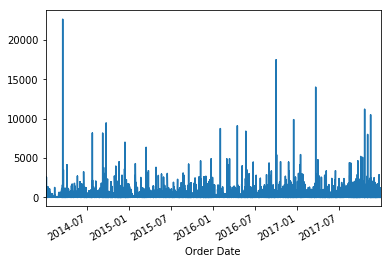

In [68]:
a['Sales'].plot()

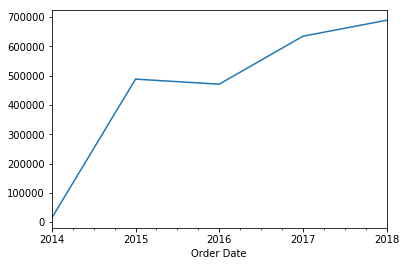

In [75]:
a.resample('12M').sum()['Sales'].plot()